## natioanl health & nutrition exam. survey 
- 2005 - 2006 code book
- FFQRAW_D.XPT: dietary interview:  total nutrient intake, first day
https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/DR1TOT_D.htm#DR1TCAFF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# open
ff = pd.read_sas('resources/DR1TOT_D.XPT')
ff.head()

/Users/yinglin/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


SEQN        WTDRD1        WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
0  31127.0   4718.873252   5906.472362       1.0      57.0    2.0     2.0   
1  31128.0   3933.789046   4250.890435       1.0      16.0    2.0     2.0   
2  31129.0  26719.805504  26719.805504       1.0      10.0    2.0     2.0   
3  31130.0           NaN           NaN       5.0       NaN    NaN     NaN   
4  31131.0  13595.895940  14822.479326       1.0      16.0    2.0     2.0   

   DR1DAY  DR1LANG  DR1MNRSP  ...  DRD370QQ  DRD370R  DRD370RQ  DRD370S  \
0     7.0      1.0       3.0  ...       NaN      NaN       NaN      NaN   
1     6.0      1.0       1.0  ...       NaN      NaN       NaN      NaN   
2     2.0      1.0       1.0  ...       NaN      2.0       NaN      2.0   
3     NaN      NaN       NaN  ...       NaN      NaN       NaN      NaN   
4     6.0      1.0       1.0  ...       NaN      2.0       NaN      2.0   

   DRD370SQ  DRD370T  DRD370TQ  DRD370U  DRD370UQ  DRD370V  
0       NaN      NaN       NaN      NaN       NaN      NaN  
1       NaN      NaN       NaN      NaN       NaN      NaN  
2       NaN      2.0       NaN      2.0       NaN      2.0  
3       NaN      NaN       NaN      NaN       NaN      NaN  
4       NaN      2.0       NaN      2.0       NaN      2.0  

[5 rows x 160 columns]

In [3]:
ff.columns

Index(['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=160)

### col of int.
SEQN - Respondent sequence number

DR1DRSTZ - Dietary recall status

DRQSDT4 - Sugar free/Low sugar diet

DR1TKCAL - Energy (kcal)

DR1TPROT - Protein (gm)

DR1TCARB - Carbohydrate (gm)

DR1TSUGR - Total sugars (gm)

DR1TFIBE - Dietary fiber (gm)

DR1TTFAT - Total fat (gm)

DR1TSFAT - Total saturated fatty acids (gm)

DR1TCAFF - Caffeine (mg)

In [4]:
# df with col. of int. 
ff = ff.loc[:, ['SEQN', 'DR1DRSTZ', 'DRQSDT4', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB',
                'DR1TSUGR','DR1TFIBE', 'DR1TTFAT','DR1TSFAT', 'DR1TCAFF'
                ]]
ff.head()

SEQN  DR1DRSTZ  DRQSDT4  DR1TKCAL  DR1TPROT  DR1TCARB  DR1TSUGR  \
0  31127.0       1.0      NaN    1421.0     50.42    171.45    139.02   
1  31128.0       1.0      NaN    1402.0     32.51    180.88     88.69   
2  31129.0       1.0      NaN    4110.0    139.89    684.22    498.82   
3  31130.0       5.0      NaN       NaN       NaN       NaN       NaN   
4  31131.0       1.0      NaN    1458.0     27.43    233.73    146.01   

   DR1TFIBE  DR1TTFAT  DR1TSFAT      DR1TCAFF  
0       4.6     61.28    25.994  5.397605e-79  
1      10.0     65.05    23.381  3.300000e+01  
2      14.5     94.73    38.599  7.000000e+00  
3       NaN       NaN       NaN           NaN  
4       6.4     50.86    18.274  1.300000e+01

In [5]:
len(ff)

9950

In [6]:
# rename col.
ff_1 = ff.rename(columns={
                     'SEQN': 'Respondent sequence number',
                     'DR1DRSTZ':'Dietary recall status',
                     'DRQSDT4': 'Sugar free/Low sugar diet',
                     'DR1TKCAL': 'Energy (kcal)',
                     'DR1TPROT' :'Protein (gm)',
                     'DR1TCARB': 'Carbohydrate (gm)',
                     'DR1TSUGR':'Total sugars (gm)',
                     'DR1TFIBE':'Dietary fiber (gm)',
                     'DR1TTFAT': 'Total fat (gm)',
                     'DR1TSFAT': 'Total saturated fatty acids (gm)',
                     'DR1TCAFF': 'Caffeine (mg)'})
ff_1.head()


Respondent sequence number  Dietary recall status  \
0                     31127.0                    1.0   
1                     31128.0                    1.0   
2                     31129.0                    1.0   
3                     31130.0                    5.0   
4                     31131.0                    1.0   

   Sugar free/Low sugar diet  Energy (kcal)  Protein (gm)  Carbohydrate (gm)  \
0                        NaN         1421.0         50.42             171.45   
1                        NaN         1402.0         32.51             180.88   
2                        NaN         4110.0        139.89             684.22   
3                        NaN            NaN           NaN                NaN   
4                        NaN         1458.0         27.43             233.73   

   Total sugars (gm)  Dietary fiber (gm)  Total fat (gm)  \
0             139.02                 4.6           61.28   
1              88.69                10.0           65.05   
2             498.82                14.5           94.73   
3                NaN                 NaN             NaN   
4             146.01                 6.4           50.86   

   Total saturated fatty acids (gm)  Caffeine (mg)  
0                            25.994   5.397605e-79  
1                            23.381   3.300000e+01  
2                            38.599   7.000000e+00  
3                               NaN            NaN  
4                            18.274   1.300000e+01

In [7]:
ff_1.to_csv('resources/total_nutrition.csv', index=False, header=True)

---
### Dietary recall status

In [8]:
ff_1['Dietary recall status'].value_counts()

1.0    9169
5.0     417
2.0     184
4.0     180
Name: Dietary recall status, dtype: int64

In [9]:
ff_1['Dietary recall status'].unique()

array([1., 5., 4., 2.])

In [10]:
ff_1['Dietary recall status'] = ff_1['Dietary recall status'].replace(
    {1: 'reliable and met the mininum criteria',
     2: 'not reliable or met the minimum criteria',
     4: 'reported consuming breast-milk ',
     5: 'not done'}
)
ff_1['Dietary recall status']

0       reliable and met the mininum criteria
1       reliable and met the mininum criteria
2       reliable and met the mininum criteria
3                                    not done
4       reliable and met the mininum criteria
                        ...                  
9945    reliable and met the mininum criteria
9946    reliable and met the mininum criteria
9947    reliable and met the mininum criteria
9948    reliable and met the mininum criteria
9949    reliable and met the mininum criteria
Name: Dietary recall status, Length: 9950, dtype: object

<AxesSubplot:ylabel='Dietary recall status'>

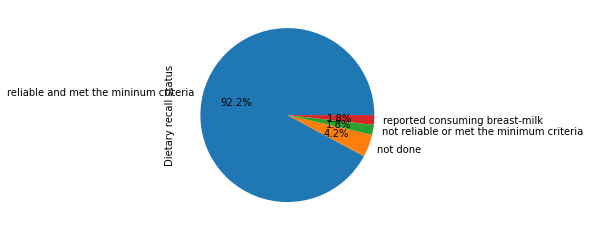

In [11]:
count_recall = ff_1['Dietary recall status'].value_counts()
count_recall.plot(kind='pie', autopct='%1.1f%%')

- most people reliable reacall their dietary status

---
### sugar free/low sugar diet

In [12]:
ff_1['Sugar free/Low sugar diet'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Sugar free/Low sugar diet, dtype: float64

In [13]:
ff_1['Sugar free/Low sugar diet'].unique()

array([nan,  4.])

In [14]:
ff_1['Sugar free/Low sugar diet'].value_counts()
# 4:  sugar free or low sugar diet 
# NaN: missing 

4.0    67
Name: Sugar free/Low sugar diet, dtype: int64

In [15]:
count_sugarF = ff_1['Sugar free/Low sugar diet'].value_counts()
count_sugarF
# 4:  sugar free or low sugar diet 
# NaN: missing 

4.0    67
Name: Sugar free/Low sugar diet, dtype: int64

<AxesSubplot:ylabel='Sugar free/Low sugar diet'>

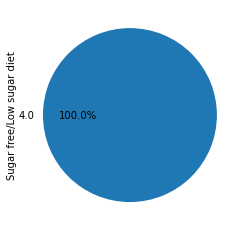

In [16]:
count_sugarF.plot(kind='pie', autopct='%1.1f%%')

- almost 100% people are NOT on a sugarfree/low sugar diet

---
### energy (kcal/day)


In [17]:
cal = ff_1['Energy (kcal)'].value_counts()
cal


1456.0    13
1864.0    12
1934.0    11
1583.0    11
1514.0    11
          ..
282.0      1
541.0      1
486.0      1
4479.0     1
3207.0     1
Name: Energy (kcal), Length: 3288, dtype: int64

Text(0, 0.5, 'count')

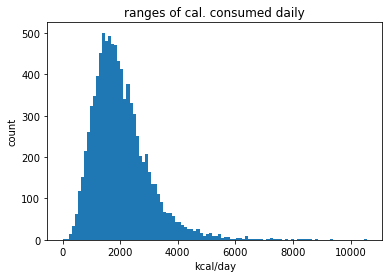

In [18]:
plt.hist(ff_1['Energy (kcal)'].values, bins=100)
plt.title('ranges of cal. consumed daily')
plt.xlabel('kcal/day')
plt.ylabel('count')

In [19]:
ff_1['Energy (kcal)'].describe()

count    9.169000e+03
mean     2.027331e+03
std      9.961382e+02
min      5.397605e-79
25%      1.353000e+03
50%      1.855000e+03
75%      2.496000e+03
max      1.056900e+04
Name: Energy (kcal), dtype: float64

---
### protein (gm)

In [20]:
protein = ff_1['Protein (gm)'].value_counts()
protein

65.20    5
58.16    5
55.78    4
40.59    4
55.72    4
        ..
50.94    1
70.14    1
83.98    1
82.94    1
79.15    1
Name: Protein (gm), Length: 7944, dtype: int64

Text(0, 0.5, 'count')

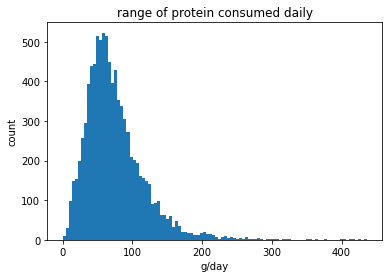

In [21]:
plt.hist(ff_1['Protein (gm)'].values, bins=100)
plt.title('range of protein consumed daily')
plt.xlabel('g/day')
plt.ylabel('count')

- most people consumed between 75 to 100 g/day

In [22]:
ff_1['Protein (gm)'].describe()

count    9.169000e+03
mean     7.437701e+01
std      4.226401e+01
min      5.397605e-79
25%      4.643000e+01
50%      6.599000e+01
75%      9.286000e+01
max      4.363300e+02
Name: Protein (gm), dtype: float64

---
### carb. (gm)

In [23]:
count_carb = ff_1['Carbohydrate (gm)'].value_counts()
count_carb

75.42     4
171.45    3
228.84    3
241.64    3
335.35    3
         ..
159.22    1
238.09    1
86.47     1
223.46    1
514.49    1
Name: Carbohydrate (gm), Length: 8765, dtype: int64

Text(0, 0.5, 'count')

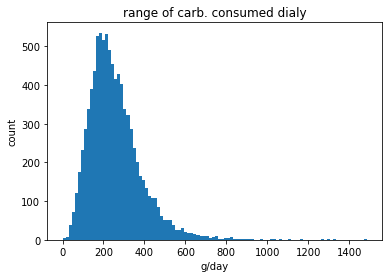

In [24]:
plt.hist(ff_1['Carbohydrate (gm)'].values, bins=100)
plt.title('range of carb. consumed dialy')
plt.xlabel('g/day')
plt.ylabel('count')

- most people consumed 180 to 400 g/day

In [25]:
ff_1['Carbohydrate (gm)'].describe()

count    9.169000e+03
mean     2.566251e+02
std      1.296515e+02
min      5.397605e-79
25%      1.687200e+02
50%      2.343500e+02
75%      3.188500e+02
max      1.486700e+03
Name: Carbohydrate (gm), dtype: float64

---
### % of carbs energy

In [26]:
ff_1['carb cal(%)'] = (ff_1['Carbohydrate (gm)'] * 4 / ff_1['Energy (kcal)']) * 100
ff_1['carb cal(%)']

0       48.261787
1       51.606277
2       66.590754
3             NaN
4       64.123457
          ...    
9945    41.368821
9946    37.876957
9947    48.514895
9948    47.564753
9949    64.170876
Name: carb cal(%), Length: 9950, dtype: float64

Text(0, 0.5, 'count')

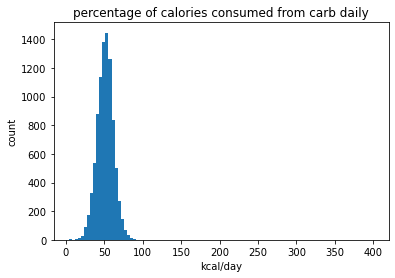

In [27]:
plt.hist(ff_1['carb cal(%)'], bins=100)
plt.title('percentage of calories consumed from carb daily')
plt.xlabel('kcal/day')
plt.ylabel('count')

In [28]:
ff_1['carb cal(%)'].describe()

count    9169.000000
mean       51.397535
std        11.168970
min         4.118750
25%        44.476553
50%        51.634015
75%        58.071739
max       400.000000
Name: carb cal(%), dtype: float64

---
### dietary fiber (gm)

In [29]:
count_fib = ff_1['Dietary fiber (gm)'].value_counts()
count_fib

5.397605e-79    97
8.200000e+00    48
7.500000e+00    47
9.500000e+00    47
1.050000e+01    46
                ..
4.230000e+01     1
4.500000e+01     1
1.100000e+00     1
3.240000e+01     1
4.070000e+01     1
Name: Dietary fiber (gm), Length: 1249, dtype: int64

Text(0, 0.5, 'count')

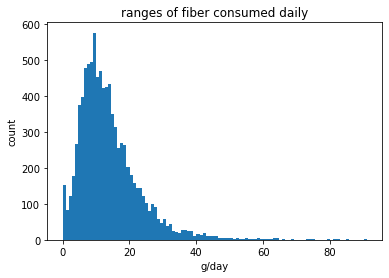

In [30]:
plt.hist(ff_1['Dietary fiber (gm)'].values, bins=100)
plt.title('ranges of fiber consumed daily')
plt.xlabel('g/day')
plt.ylabel('count')

In [31]:
ff_1['Dietary fiber (gm)'].describe()

count    9.169000e+03
mean     1.380285e+01
std      9.051290e+00
min      5.397605e-79
25%      7.600000e+00
50%      1.200000e+01
75%      1.770000e+01
max      9.100000e+01
Name: Dietary fiber (gm), dtype: float64

- most people consumed around 12 to 18g of fiber

(array([  97.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   20.,  170., 5427.,
        3455.]),
 array([-180.21826695, -178.37097568, -176.52368442, -174.67639315,
        -172.82910189, -170.98181062, -169.13451936, -167.28722809,
        -165.43993683, -163.59264556, -161.7453543 , -159.89806304

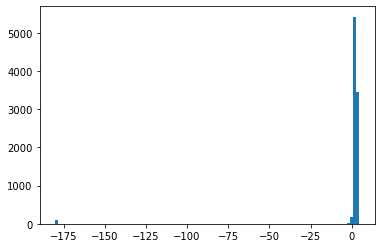

In [32]:
# log
plt.hist(np.log(ff_1['Dietary fiber (gm)'].values), bins=100)

---
### total fat (gm)

In [33]:
fat = ff_1['Total fat (gm)'].value_counts()
fat

35.74     5
38.89     5
34.56     5
66.12     5
94.26     4
         ..
37.28     1
39.83     1
151.32    1
65.56     1
96.47     1
Name: Total fat (gm), Length: 7960, dtype: int64

Text(0, 0.5, 'count')

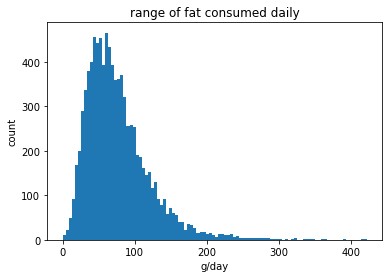

In [34]:
plt.hist(ff_1['Total fat (gm)'].values, bins=100)
plt.title('range of fat consumed daily')
plt.xlabel('g/day')
plt.ylabel('count')

In [35]:
ff_1['Total fat (gm)'].describe()

count    9.169000e+03
mean     7.634950e+01
std      4.427287e+01
min      5.397605e-79
25%      4.565000e+01
50%      6.752000e+01
75%      9.664000e+01
max      4.225900e+02
Name: Total fat (gm), dtype: float64

- most people consumed around 75 - 100 g of fat daily

---
### total sat. fatty acids (gm)

In [36]:
sat_fat = ff_1['Total saturated fatty acids (gm)'].value_counts
sat_fat

<bound method IndexOpsMixin.value_counts of 0       25.994
1       23.381
2       38.599
3          NaN
4       18.274
         ...  
9945     9.308
9946    34.771
9947    90.754
9948    23.689
9949    32.273
Name: Total saturated fatty acids (gm), Length: 9950, dtype: float64>

Text(0, 0.5, 'count')

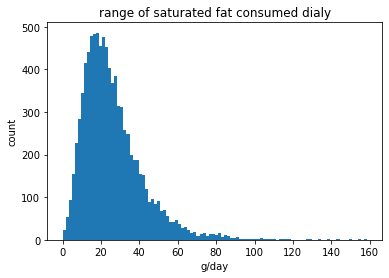

In [37]:
plt.hist(ff_1['Total saturated fatty acids (gm)'].values, bins=100)
plt.title('range of saturated fat consumed dialy')
plt.xlabel('g/day')
plt.ylabel('count')

<AxesSubplot:xlabel='Total saturated fatty acids (gm)', ylabel='Count'>

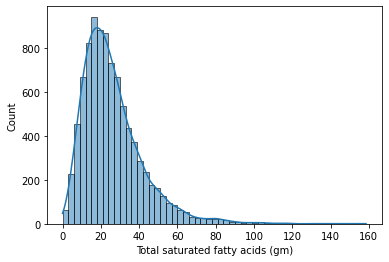

In [38]:
# one way
sns.histplot(ff_1['Total saturated fatty acids (gm)'],
       bins=100, element='bars', binwidth=3, kde=True)

<AxesSubplot:xlabel='Total saturated fatty acids (gm)', ylabel='Count'>

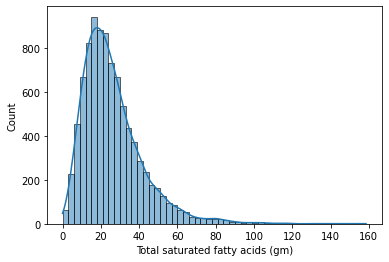

In [39]:
# second way
sns.histplot(data=ff_1, x='Total saturated fatty acids (gm)', 
             binwidth=3, kde=True)

In [40]:
ff_1['Total saturated fatty acids (gm)'].describe()

count    9.169000e+03
mean     2.609123e+01
std      1.594140e+01
min      5.397605e-79
25%      1.515300e+01
50%      2.276500e+01
75%      3.314400e+01
max      1.585470e+02
Name: Total saturated fatty acids (gm), dtype: float64

---
### seaborn correlation

In [41]:
ff_1.columns

Index(['Respondent sequence number', 'Dietary recall status',
       'Sugar free/Low sugar diet', 'Energy (kcal)', 'Protein (gm)',
       'Carbohydrate (gm)', 'Total sugars (gm)', 'Dietary fiber (gm)',
       'Total fat (gm)', 'Total saturated fatty acids (gm)', 'Caffeine (mg)',
       'carb cal(%)'],
      dtype='object')

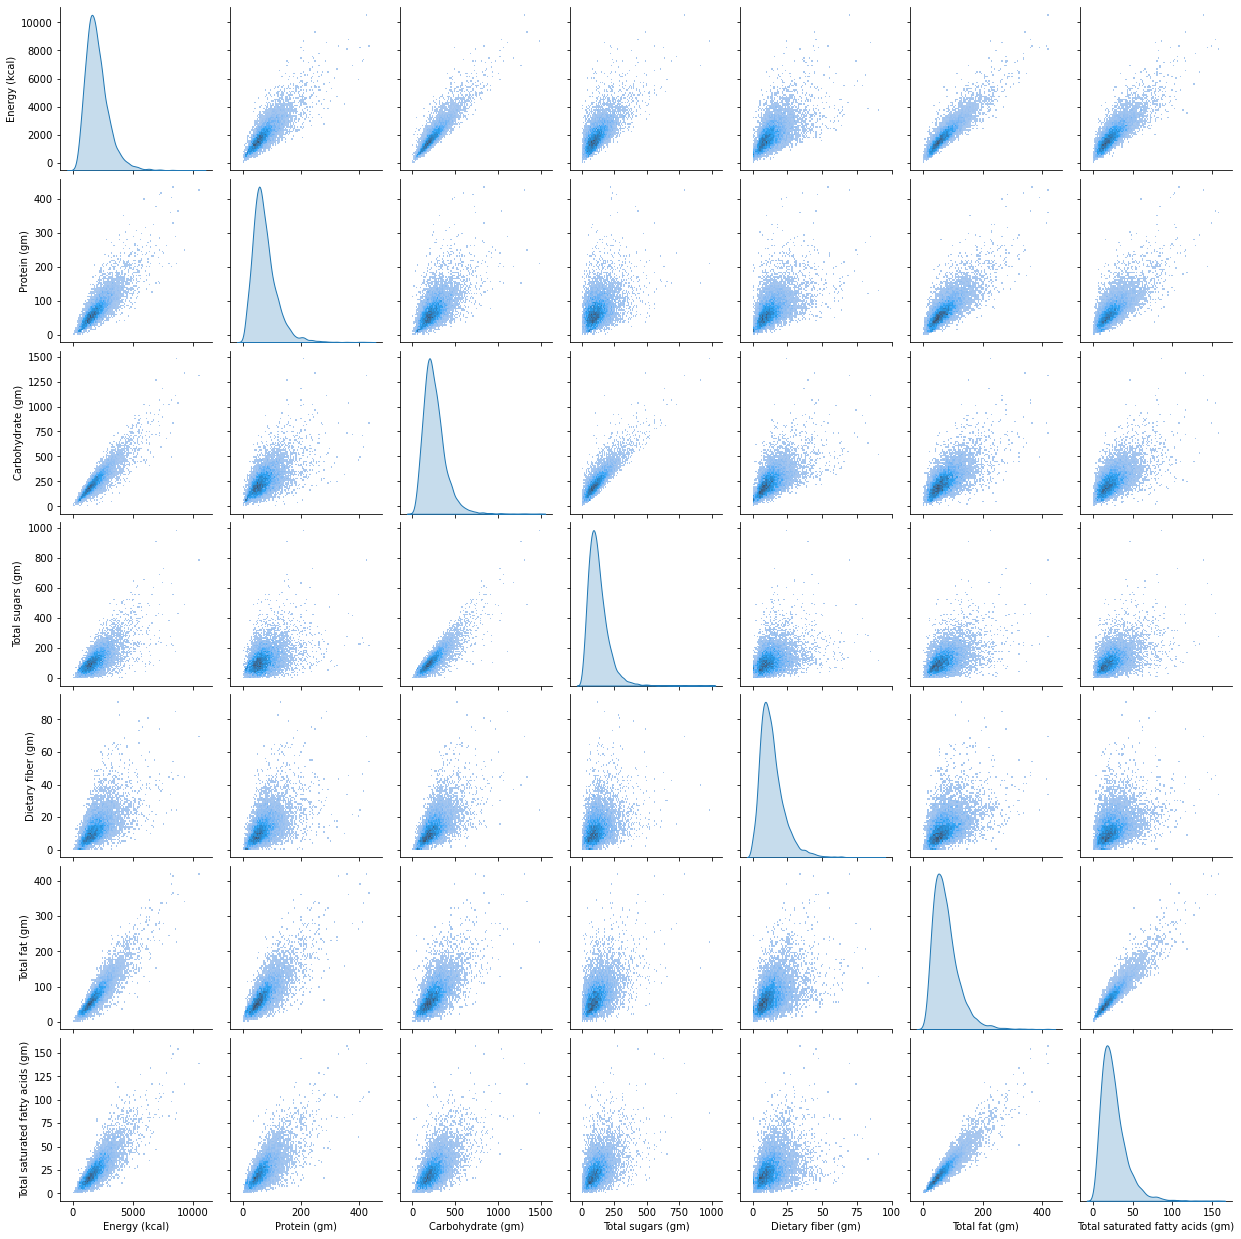

In [42]:
sns.pairplot(ff_1[['Energy (kcal)', 'Protein (gm)', 'Carbohydrate (gm)',
                   'Total sugars (gm)', 'Dietary fiber (gm)', 'Total fat (gm)',
                   'Total saturated fatty acids (gm)']],
                   diag_kind='kde', kind='hist')